In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr
# from sklearn.decomposition import PCA

In [53]:
path='C:\\Users\\personal\\Desktop\\MSIT\\IT\\DataScience_2019501026\\Intro to ML\\code camp\\house-prices-advanced-regression-techniques\\'
train = path + "train.csv"
test = path + "test.csv"

In [54]:
trainx_df = pd.read_csv(train, index_col = 'Id')
print(trainx_df.shape)
trainy_df = trainx_df['SalePrice']
print(trainy_df.shape)


(1460, 80)
(1460,)


In [55]:
trainx_df.drop('SalePrice', axis=1, inplace=True)
testx_df = pd.read_csv(test, index_col='Id')
print(trainx_df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64


In [56]:
sample_size = len(trainx_df)
columns_with_null_values = []
columns_with_null_values = [[col, float(trainx_df[col].isnull().sum())/float(sample_size)] for col in trainx_df.columns if trainx_df[col].isnull().sum()]
print(columns_with_null_values)

[['LotFrontage', 0.1773972602739726], ['Alley', 0.9376712328767123], ['MasVnrType', 0.005479452054794521], ['MasVnrArea', 0.005479452054794521], ['BsmtQual', 0.025342465753424658], ['BsmtCond', 0.025342465753424658], ['BsmtExposure', 0.026027397260273973], ['BsmtFinType1', 0.025342465753424658], ['BsmtFinType2', 0.026027397260273973], ['Electrical', 0.0006849315068493151], ['FireplaceQu', 0.4726027397260274], ['GarageType', 0.05547945205479452], ['GarageYrBlt', 0.05547945205479452], ['GarageFinish', 0.05547945205479452], ['GarageQual', 0.05547945205479452], ['GarageCond', 0.05547945205479452], ['PoolQC', 0.9952054794520548], ['Fence', 0.8075342465753425], ['MiscFeature', 0.963013698630137]]


In [57]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y>.3]
print(columns_to_drop)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [58]:
trainx_df.drop(columns_to_drop, axis = 1, inplace=True)
testx_df.drop(columns_to_drop, axis=1, inplace=True)

In [59]:
categorical_columns = [col for col in trainx_df.columns if
                      trainx_df[col].dtype == object]
ordinal_columns = [col for col in trainx_df.columns if col not in categorical_columns]
# categorical_columns.append('MSSubClass')
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [60]:
dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
print(dummy_row)

['', 'dummy', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', '', 'dummy', '', 'dummy', '', 'dummy', '', 'dummy', '', '', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', 'dummy', 'dummy']


In [61]:
new_row = pd.DataFrame([dummy_row], columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis = 0, ignore_index = True)
testx_df = pd.concat([testx_df], axis = 0, ignore_index = True)
# trainx_df.to_csv["dummy.csv"]
for col in categorical_columns:
    trainx_df[col].fillna(value = "dummy", inplace = True)
    testx_df[col].fillna(value = "dummy", inplace = True)

In [62]:
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(trainx_df[categorical_columns])
#print(enc.get_feature_names(categorical_columns))
trainx_enc=pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
testx_enc = pd.DataFrame(enc.transform(testx_df[categorical_columns]))
trainx_enc.columns=enc.get_feature_names(categorical_columns)
testx_enc.columns=enc.get_feature_names(categorical_columns)
trainx_df=pd.concat([trainx_df[ordinal_columns],trainx_enc],axis=1,ignore_index=True)
testx_df=pd.concat([testx_df[ordinal_columns],testx_enc],axis=1,ignore_index=True)
trainx_df.drop(trainx_df.tail(1).index,inplace=True)
imputer = KNNImputer(n_neighbors=2)
imputer.fit(trainx_df)
trainx_df_filled=imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled,columns=trainx_df.columns)
testx_df_filled=imputer.transform(testx_df)
testx_df_filled = pd.DataFrame(testx_df_filled,columns=testx_df.columns)
testx_df_filled.reset_index(drop=True,inplace=True)
print(trainx_df_filled.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    0
Length: 270, dtype: int64


In [63]:
scaler = preprocessing.StandardScaler().fit(trainx_df)
trainx_df=scaler.transform(trainx_df)
testx_df=scaler.transform(testx_df)
print(trainx_df,testx_df)

[[ 0.07337496 -0.20803433 -0.20714171 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.40989452 -0.09188637 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496 -0.08444856  0.07347998 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [ 0.30985939 -0.16683907 -0.14781027 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276 -0.08444856 -0.08016039 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.20391824 -0.05811155 ...  0.4676514  -0.30599503
   0.        ]] [[-0.87256276  0.40989452  0.11076257 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.45108977  0.37584985 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496  0.16272298  0.33205282 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [-0.87256276  3.70551504  0.95042275 ... -2.13834494 -0.30599503
   0.        ]
 [ 0.66458604 -0.3316201  -0.00759964 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496  0.16272298 -0.08918038 ...  0.4676514  -0.30599503
   0.        ]]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(trainx_df_filled, trainy_df.values.ravel(), test_size=.3, random_state=42)
print(X_train, X_test, y_train, y_test)

        0     1        2    3    4       5       6      7      8      9    \
135    20.0  80.0  10400.0  7.0  6.0  1970.0  1970.0  288.0    0.0    0.0   
1452  180.0  35.0   3675.0  5.0  5.0  2005.0  2005.0   80.0  547.0    0.0   
762    60.0  72.0   8640.0  7.0  5.0  2009.0  2009.0    0.0   24.0    0.0   
932    20.0  84.0  11670.0  9.0  5.0  2006.0  2006.0  302.0    0.0    0.0   
435    60.0  43.0  10667.0  7.0  6.0  1996.0  1996.0    0.0  385.0  344.0   
...     ...   ...      ...  ...  ...     ...     ...    ...    ...    ...   
1095   20.0  78.0   9317.0  6.0  5.0  2006.0  2006.0    0.0   24.0    0.0   
1130   50.0  65.0   7804.0  4.0  3.0  1928.0  1950.0    0.0  622.0    0.0   
1294   20.0  60.0   8172.0  5.0  7.0  1955.0  1990.0    0.0  167.0    0.0   
860    50.0  55.0   7642.0  7.0  8.0  1918.0  1998.0    0.0    0.0    0.0   
1126  120.0  53.0   3684.0  7.0  5.0  2007.0  2007.0  130.0    0.0    0.0   

      ...  260  261  262  263  264  265  266  267  268  269  
135   ...  0.

In [65]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.9342381557000332
0.7212290372188543


[0.1, 1.2000000000000002, 2.3000000000000003, 3.4000000000000004, 4.5, 5.6, 6.7, 7.800000000000001, 8.9, 10.0] 
 [0.9231840082, 0.9065191593, 0.9027279007, 0.9001498458, 0.8980693475, 0.8962709126, 0.8946605732, 0.8931885984, 0.8918250966, 0.8905503831] 
 [0.8684218462, 0.8770165776, 0.8772475777, 0.8775013591, 0.8776724472, 0.8777608933, 0.8777813553, 0.8777484045, 0.8776740024, 0.8775674951] 
 [462322843.9088, 562621494.3629, 585439470.4826, 600955688.3051, 613477324.7633, 624301340.8729, 633993290.2054, 642852481.6473, 651058819.5799, 658730779.128] 
 [918164694.2375, 858189852.7088, 856577912.2021, 854807001.4924, 853613133.3075, 852995947.9534, 852853162.1537, 853083096.0371, 853602280.4888, 854345498.7981]


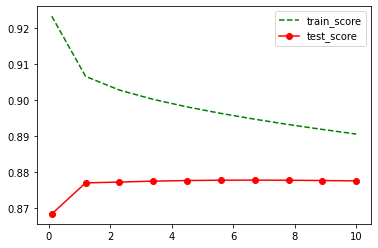

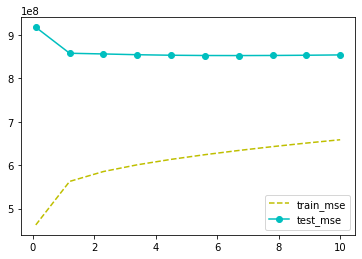

In [66]:
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
alpha_start = 0.1
alpha_end = 10
jumps = 10
for sigma in np.linspace(alpha_start, alpha_end, jumps):
    alpha.append(sigma)
    reg = Ridge(alpha = sigma, tol = 0.0001)
    reg = reg.fit(X_train,y_train)
    score_train.append(round(reg.score(X_train, y_train),10))
    score_test.append(round(reg.score(X_test, y_test),10))
    mse_train.append(round(mserr(y_train,reg.predict(X_train)),4))
    mse_test.append(round(mserr(y_test,reg.predict(X_test)),4))
print(alpha,'\n', score_train, '\n',score_test,'\n', mse_train, '\n',mse_test) 
plt.figure(1)
plt.plot(alpha, score_train, 'g--',label="train_score")
plt.plot(alpha, score_test, 'r-o',label="test_score")
plt.xlabel='Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label="train_mse")
plt.plot(alpha, mse_test, 'c-o',label="test_mse")
plt.xlabel='Alpha'
plt.legend()
plt.show()

In [67]:
testpred = pd.DataFrame(reg.predict(testx_df_filled))
testpred.to_csv("test_pred1.csv")